#Wrangle and Analyse data :     
## Project Topic : Dog rates Data Analysis
###Project Outline : Access data from various sources, including Tweepy, twitter API, Assessing and Visualisation of Data.

###Questions Posed Prior to Data Analysis :    
  * In which language most of tweets are written?
  * What is the most common names, people give their dogs?
  * Considering, accumulated data, Which dogtype has the highest presence in the data set? (Doggo/Floofer/Pupper/Puppo)
  * Given the complete data set, What is the avg. ratio of Favorite Count to Retweet Counts?
  * Visua;lise and asses the difference in values of these two columns.



# **Importing Necesary libraries and Analysing Data**

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Gathering Data 

### 1. Twitter Archived Enhanced CSV

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Utkarsh doc/twitter-archive-enhanced.csv')

### 2. Image Predictions.tsv

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
dfimage = pd.read_csv('/content/image_predictions.tsv', sep='\t')

### 3. Twitter Api Data 

Data was collected using the JSON File as Necessary Documents for the twitter developer account Coudn't be made.


In [4]:
dftweet = pd.read_json('/content/drive/MyDrive/Utkarsh doc/tweet.json', lines=True)

Note - Code to fetch twitter data using api has been commented out below, due to the above reason.

In [5]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\ncount = 0\nfails_dict = {}\nstart = timer()\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[twee

## Assesing The Data

In [6]:
# Define - Twitter Enhanced Data
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Define - Image Prediction Data
dfimage.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
dfimage.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [13]:
dfimage.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# Define - Twitter Api Data
dftweet.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
dftweet.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [17]:
dftweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Cleaning the Data

### 1. Defining copy dataframes before cleaning to retain original values

In [18]:
#Define
df_unclean = df.copy()
dftweet_unclean = dftweet.copy()
dfimage_unclean = dfimage.copy()

### 2. Defining irrelevance of certain columns in our first dataframe:
  * Many columns in our first dataframe 'df', consist values that would not affect our basis of analysis in future so we drop them off in the first place.

### 3. Code for Cleaning irrelevant columns from this df.

In [19]:
#Code
#DF CLeaning
#dropping all irrelevant columns from df, 'twitter_enhanced_archive.csv'
df.drop(['in_reply_to_status_id','source', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis = 1, inplace = True)

In [20]:
#merging and creating new column 'dogtype', from below merged four pre defined columns
df['dogtype']= df['doggo'] + df['floofer'] + df['pupper'] + df['puppo']

### 4. Testing new made column for new values.

In [21]:
#engineering values in the new created column
count = 0
for i,r in enumerate(df.dogtype):
    
    if r == "NoneNoneNoneNone":
      count = count+1
print(count)

1976


### 5. Coding for altering values for redundancy reduction in new column.

In [22]:
#...engineering values
for i,r in enumerate(df.dogtype):
    
    if r == "NoneNoneNoneNone":
      df.dogtype[i]= "undefined"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
for i,r in enumerate(df['dogtype']):
  if 'None' in r:
    df.dogtype[i] = df.dogtype[i].replace('None', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#dropping pre defined columns after merging into new one.
df.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

### 6. Testing dataframe after alterations done to 'df'

In [25]:
# checking newly engineered df.
df.head(1)

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,dogtype
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,undefined


### 7. Defining problem for rating_numerator column , Values are inconsitent and alot of values are missing out on decimal values, instead fetching data from 'text' column would suggest much accurate values.

### 8. Coding for altering values and engineering clean values for above column.

In [26]:
# clean Ratings using Below
ratings = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df.rating_numerator = ratings
df.rating_numerator = df.rating_numerator.astype('float64')

In [27]:
#dropping 'text' column after using rating values from it.
df.drop(['text'], axis = 1, inplace = True)

### 9. Testing values of new made column.

In [28]:
df.rating_numerator.mean()

13.063679966044143

### 10. Defining problem with 'retweet_status_id' column, As values in this column have None values, and having rows with Null values would bias our analysis in terms of retweet counts , so we drop all such rows.

### 11. Coding for removing rows with Null values in above said column.

In [29]:
#filtering tweets with retweet_status_id not equal to None, getting rid of all tweets with Null values in that column
df = df[df['retweeted_status_id'] != None]


### 12. Testing values after above alterations.

In [30]:
df.isna()

,tweet_id,timestamp,retweeted_status_id,rating_numerator,rating_denominator,name,dogtype
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
2351,False,False,True,False,False,False,False
2352,False,False,True,False,False,False,False
2353,False,False,True,False,False,False,False
2354,False,False,True,False,False,False,False


As it occurs huge number of rows contain NAN value and only few (10) rows have values in them, it'd be better to drop this column as well.

In [31]:
df.drop(['retweeted_status_id'], axis =1 , inplace = True)

### 13. Defining problem with column name containing id in dftweet(dataframe containing data from Tweepy). Changing value from 'id' to 'tweet_id' would ease out operations across multiple dataframs.

### 14. Code addressing above defined issue.

In [32]:
#DF TWEET Cleaning
#renaming id to tweet_id for better accessibility across other dataframes
dftweet.rename(columns = {'id':'tweet_id'}, inplace = True)


### 15. Testing for above made changes.

In [33]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### 16. Defining problem regarding redundant columns in data frame containing values fetched from Tweepy API. Dropping All those columns from Dataframe in steps followed.


### 17. Code for dropping redundant and irrelevant columns from dftweet .

In [34]:
#dropping all irrelevant columns from tweepy dataframe
dftweet.drop(['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities','source','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','is_quote_status','favorited','retweeted','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], axis=1 , inplace=True)

### 18. Testing changes made above.

In [35]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   tweet_id            2354 non-null   int64              
 2   retweet_count       2354 non-null   int64              
 3   favorite_count      2354 non-null   int64              
 4   possibly_sensitive  2211 non-null   float64            
 5   lang                2354 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 110.5+ KB


### 19. Defining problem regarding alphabetic case issue with values in 'prediction' column of dfimage (dataframe containing values from image prediction tsv file), inconsitent data in three columns 'p1', 'p2', 'p3' found and fixed below.

### 20. Code for performing changes for resolving above said problem.

In [36]:
# lower case coversion for predictions column in image prediction dataframe.
dfimage["p1"] = dfimage["p1"].str.lower()
dfimage["p2"] = dfimage["p2"].str.lower()
dfimage["p3"] = dfimage["p3"].str.lower()

### 21. Testing df for above made changes. 

In [37]:
count = 0
for i,r in enumerate(dfimage.p1):
  if r.islower():
    continue
  else:
    count = count+1
print(count)

0


In [38]:
count = 0
for i,r in enumerate(dfimage.p3):
  if r.islower():
    continue
  else:
    count = count+1
print(count)

0


In [39]:
count = 0
for i,r in enumerate(dfimage.p3):
  if r.islower():
    continue
  else:
    count = count+1
print(count)

0


### 22. Definig problem with datatype of timestamp column and changing it to datetime object.

### 23. Coding for altering datatype of timestamp column.

In [40]:
#changing datatype of 'start_time' & 'end_time' into datetime object
df.timestamp = pd.to_datetime(df.timestamp)


### 24. Testing results after previous alteration.

In [41]:
df.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
rating_numerator                  float64
rating_denominator                  int64
name                               object
dogtype                            object
dtype: object

### 25. Defining problem with scattered data across three different dataframes. Merging all in one would ease out future operations and analysis. Here Merging data on 'tweet_id' as primary key, would be an appropriate approach.

### 26. Code for merging all data into one dataframe.

In [42]:
#merging all cleaned data into one new dataframe for better analysis and visualization.
newdf = pd.merge(df, dfimage, on="tweet_id")
merged_clean_data = pd.merge(newdf, dftweet, on="tweet_id")

### 27. Testing new engineered clean dataframe. 'merged_clean_data'

In [43]:
#checking for null values in new engineered df.

merged_clean_data.isnull().sum()

tweet_id              0
timestamp             0
rating_numerator      0
rating_denominator    0
name                  0
dogtype               0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
created_at            0
retweet_count         0
favorite_count        0
possibly_sensitive    0
lang                  0
dtype: int64

### Storing Data

In [44]:
df.to_csv('tweet_enhanced_cleaned.csv', index = False)
dftweet.to_csv('tweetapi_cleaned.csv', index = False)
dfimage.to_csv('image_prediction_cleaned.csv', index = False)
merged_clean_data.to_csv('twitter_archive_master.csv', index = False)

Cleaned and merged data has been stored here as csv.

In [45]:
newdf = merged_clean_data

## Analysing The Data 

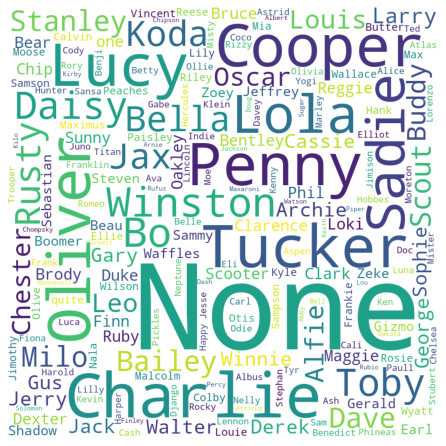

In [46]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

here we can say bigger percentage of our dog names have 'None' , so we drop it from our word cloud, giving us a better view of names in word cloud.

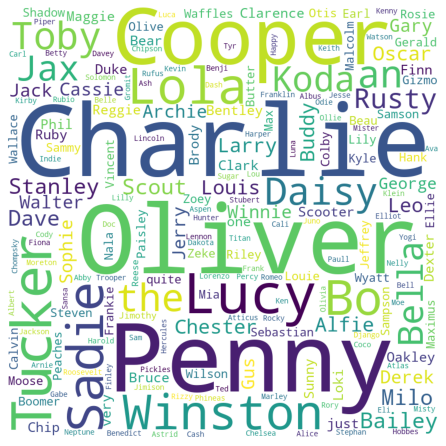

In [47]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = ['None'],
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

I see Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given in our dataframe.
(rest all other names are present in word cloud that have less frequency.)

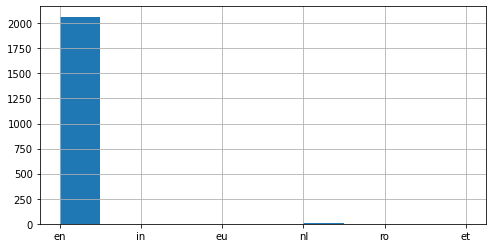

In [48]:
plt.figure(figsize = (8,4), facecolor = None)
newdf['lang'].hist()

From above histogram plot we can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.

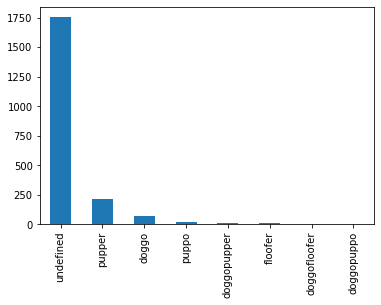

In [49]:
newdf.dogtype.value_counts().plot.bar()

It is clear, major percent of our dogs do not have any defined dog type. So performing calculations on this factor can easily affect the dignity of our datafrae. Hence I have created a separated df of dogtypes with legit values :

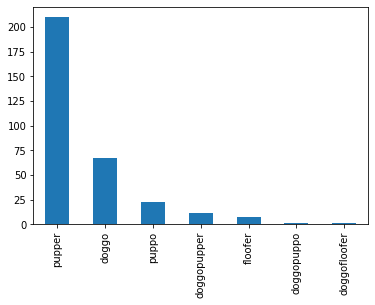

In [50]:
a = newdf.loc[newdf['dogtype'] !="undefined"]
a.dogtype.value_counts().plot.bar()

* Most of dogs with defined type are : 'pupper'.
* Followed by : 'doggo' and 'puppo'

In [51]:
rmean = newdf['retweet_count'].mean()
fmean = newdf['favorite_count'].mean()
print (rmean,fmean,fmean/rmean)

2976.0892426435116 8556.718282682103 2.875155139864555


**Mean and Ratio of Favorite Counts to that of Retweet Counts. :      **
  * Mean Retweet Count = 2976.089(approz)
  * Mean Favorite Count = 8556.71(approz)

**Ratio of Mean Favorite Count to Retweet count** = **2.87** (approx)
This indicates user tendency of adding tweets more to their **Favorite** than **Retweeting** a tweet.

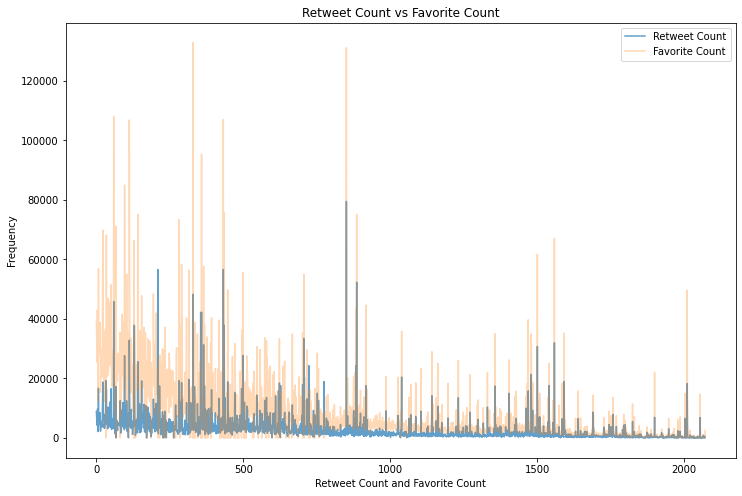

In [52]:
plt.figure(figsize = (12,8), facecolor= None)
plt.plot(newdf['retweet_count'],alpha=0.7)
plt.plot(newdf['favorite_count'],alpha=0.3)
plt.xlabel("Retweet Count and Favorite Count")
plt.ylabel("Frequency")
plt.title ("Retweet Count vs Favorite Count")
plt.legend(['Retweet Count', 'Favorite Count'])

**Infering from line graph above:**
We can clearly understand the trends followed by these two entities:
* People tend more to add a tweet to their favorites than retweeting a tweet.
* Mean of Favorite Count > Retweet Count.
* Max value of Favorite Count > Retweet Count.

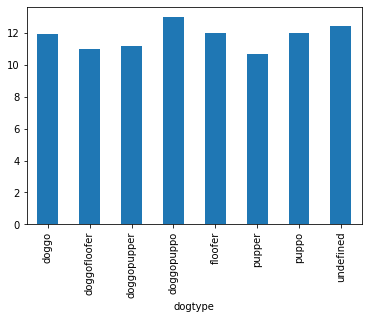

In [53]:
newdf.groupby(['dogtype']).rating_numerator.mean().plot.bar()

**Given above bar plot:**
We can see, despite being sygnificantly less in number, dogs of 'doggopuppo', category have highest mean rating overall, which are followed by 'undefined', 'doggo'and 'floofer', consecutively. 

#Conclusion:

### Data Quality issues found during Analysis : 
  

In [54]:
  """
  1 Data provided by Tweepy API had redundant data, ie; most of its columns has None or NAN values stored and needed to be cleaned before analysis.
  2 Data provided regarding DogType is inadequate as most of tweets do not have type mentioned instead, have 'None' values filled.
  3 Unnecessary/ Irrelevant data provided in form various columns such as : ['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities'...... etc, which had to be dropped.
  4 English being the major language of almost all the tweets provided(99%), lang columns could not be used for analysis purposes.
  5 Column Possible Sensitivity has '0.0' as common value for every row throughout the data frame, defying its relevance in the dataframe.
  6 The Rating_Numerator column in the data frame has vague values throughout, which in turn had to be engineered from the text column.
  7 ID column provided in tweet_json has column name different to other two data frames making alterations compulsory for smooth accessibility throughout the data frames.
  8 Data type of Date column is string where it should have been a date and time object.
  """

"\n1 Data provided by Tweepy API had redundant data, ie; most of its columns has None or NAN values stored and needed to be cleaned before analysis.\n2 Data provided regarding DogType is inadequate as most of tweets do not have type mentioned instead, have 'None' values filled.\n3 Unnecessary/ Irrelevant data provided in form various columns such as : ['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities'...... etc, which had to be dropped.\n4 English being the major language of almost all the tweets provided(99%), lang columns could not be used for analysis purposes.\n5 Column Possible Sensitivity has '0.0' as common value for every row throughout the data frame, defying its relevance in the dataframe.\n6 The Rating_Numerator column in the data frame has vague values throughout, which in turn had to be engineered from the text column.\n7 ID column provided in tweet_json has column name different to other two data frames making alte

### Tidiness issues found during Analysis : 
  

In [55]:
  """
  1 Rows with NULL values existed in all three datasets provided making it untidy.
  2 Data scattering and unorganized data  found across all dataframes.
  """

'\n1 Rows with NULL values existed in all three datasets provided making it untidy.\n2 Data scattering and unorganized data  found across all dataframes.\n'

### Analysis Conclusion Drawn 

In [56]:
  """
    1 Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given to dogs in our dataframe.
    2 We can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.
    3 Most dogs dont have a determined type yet dogs with defined type are : 'pupper'. Followed by : 'doggo' and 'puppo'
    4 Now Finally after analyzing required last two columns : Favorite Count and Retweet Count we Clear find the following observations:
        5 Favorite Count has higher Maximum Value, close to 15000(approx), while Retweet count remains maxed out at 7800 (approx)
        6 People tend to add a tweet to their favorite than retweeting a certain tweet.
        7 Mean value of Favorite Count > Retweet Count. ('**2976.0892426435116**' and '**8556.718282682103**' respectively)
        8 Ratio shared between these two entities (Favorite Count : Retweet Count) = 2.875155139864555: 1 .
  """


"\n  1 Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given to dogs in our dataframe.\n  2 We can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.\n  3 Most dogs dont have a determined type yet dogs with defined type are : 'pupper'. Followed by : 'doggo' and 'puppo'\n  4 Now Finally after analyzing required last two columns : Favorite Count and Retweet Count we Clear find the following observations:\n      5 Favorite Count has higher Maximum Value, close to 15000(approx), while Retweet count remains maxed out at 7800 (approx)\n      6 People tend to add a tweet to their favorite than retweeting a certain tweet.\n      7 Mean value of Favorite Count > Retweet Count. ('**2976.0892426435116**' and '**8556.718282682103**' respectively)\n      8 Ratio shared between these two entities (Favorite Count : Retweet Count) = 2.875155139864555: 1 .\n"